# Classificador de Doença Cardíaca

In [58]:
# Célula de imports

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


### 1 . Análise do DataFrame

In [12]:
# Carrega o DataSet
df = pd.read_csv("heart.csv")

In [ ]:
# Número de linha no data frame
print(f"Número de linhas: {len(df)}")

# Dispõe os primeiros itens do DataFrame
df.head(n = 7)


Número de linhas: 918


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


In [14]:
# Mostra o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [15]:
# Descrição dos dados
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [18]:
#  Analisa quantos valores diferentes tem em cada feature
for column in df.columns:
    qtd = len(df[column].unique())
    print(f"{column}: {qtd} valor(es)")

Age: 50 valor(es)
Sex: 2 valor(es)
ChestPainType: 4 valor(es)
RestingBP: 67 valor(es)
Cholesterol: 222 valor(es)
FastingBS: 2 valor(es)
RestingECG: 3 valor(es)
MaxHR: 119 valor(es)
ExerciseAngina: 2 valor(es)
Oldpeak: 53 valor(es)
ST_Slope: 3 valor(es)
HeartDisease: 2 valor(es)


### 2. Tratamento dos Dados

##### Valores nulos

In [24]:
# Verificando se há valores nulos:
null_mask = df.isnull().sum()
print(f"Quantidade de valores nulos por feature\n{null_mask}")

Quantidade de valores nulos por feature
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


##### Codificação

One Hot Encoder

In [38]:
# Codificação usando One Hot Encoder

# Define as colunas que serão codificadas
categorical_cols = ["ChestPainType", "RestingECG", "ST_Slope", "Sex", "ExerciseAngina"]

# Realiza a codificação
df_encoded = pd.get_dummies(df, columns=categorical_cols, dtype=int)

# Imprime DataFrame codificado 
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
0,40,140,289,0,172,0.0,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0
1,49,160,180,0,156,1.0,1,0,0,1,...,0,1,0,0,1,0,1,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,1,0,0,1,0,1,1,0
3,48,138,214,0,108,1.5,1,1,0,0,...,0,1,0,0,1,0,1,0,0,1
4,54,150,195,0,122,0.0,0,0,0,1,...,0,1,0,0,0,1,0,1,1,0


In [39]:
# Imprime o tipo de cada coluna
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   ChestPainType_ASY  918 non-null    int64  
 8   ChestPainType_ATA  918 non-null    int64  
 9   ChestPainType_NAP  918 non-null    int64  
 10  ChestPainType_TA   918 non-null    int64  
 11  RestingECG_LVH     918 non-null    int64  
 12  RestingECG_Normal  918 non-null    int64  
 13  RestingECG_ST      918 non-null    int64  
 14  ST_Slope_Down      918 non-null    int64  
 15  ST_Slope_Flat      918 non-null    int64  
 16  ST_Slope_Up        918 non

### 3. Preparação das informações

Divisão entre features(X) e rótulo(Y)

In [42]:
# Divisão entre features(X) e rótulo
X_encoded = df_encoded.drop('HeartDisease', axis=1) # Features
y = df['HeartDisease'] # Target

print(f"Features(X) = {X_encoded.shape}\nTarget(y) = {y.shape}")

Features(X) = (918, 20)
Target(y) = (918,)


Divisão em treino/teste

In [45]:
# Divisão entre treino e teste em 80%

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size= 0.2,  random_state=42)

# Mostra dados


# Showing data
print(f'Conjunto de treino:')
print(f'Features: {X_train.shape} | Target: {y_train.shape}' )
print(f'=============================================')
print(f'Conjunto de teste:')
print(f'Features: {X_test.shape} | Target: {y_test.shape}' )



Conjunto de treino:
Features: (734, 20) | Target: (734,)
Conjunto de teste:
Features: (184, 20) | Target: (184,)


### 4. Treinamento dos Modelos 

#### **4.1 Árvore de Decisão (Decision Tree)**

In [47]:
# Cria uma instância da Árvore de Decisão
clf = DecisionTreeClassifier(max_depth=3, random_state=42) 

In [48]:
# Treina o modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [49]:
# Realiza as previsões
predictions = clf.predict(X_test)

Análise dos resultados

In [51]:
# Retorna a acurácia do modelo com base no y_test
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia: {accuracy}")

Acurácia: 0.8478260869565217


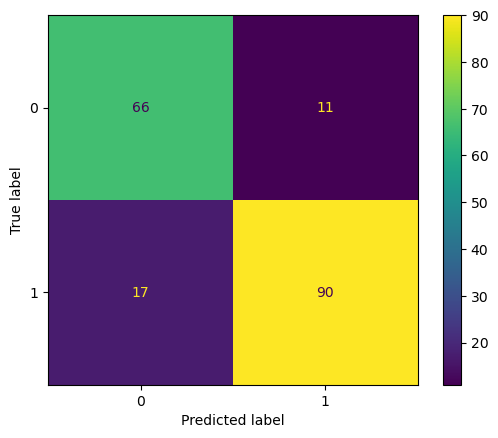

In [57]:
# Matriz de confusão
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#### **4.2 Floresta Aleatória (Random Forest)**

In [67]:
# Função que retorna a predição com base na profundidade:
def randomForest(num_depth, X_train, y_train, X_test):
    # Instancia o classificador
    rf = RandomForestClassifier(max_depth=num_depth, random_state=42)
    # Treina o modelo
    rf.fit(X_train, y_train)
    # Faz as previsões
    y_pred = rf.predict(X_test)
    # Retorna os resultados
    return y_pred

In [70]:
# Realiza a acurácia variando a profundidade de 1 até o número de features

# Lista para salvar as predições
prediction_list = []
# Lista de numero de features
depths = list(range(1, X_train.shape[1] + 1))

for i in depths:
    pred = randomForest(i, X_train, y_train, X_test)
    prediction_list.append(pred)


Análise de resultados

In [76]:
# Função para plotar gráfico com a acurácia média com base na profundidade
def plotGraph(accuracies, depths):
    
    plt.figure(figsize=(10,5))
    plt.plot(depths, accuracies, marker= 'o', linestyle='-')
    
    # Mostra o resultado em 2 casas decimais
    for i, acc in enumerate(accuracies):
        plt.text(depths[i], acc + 0.001, f"{acc:.2f}", ha='center', fontsize=8)
    
    plt.title("Média da Acurácia vs Profundidade da Árvore (max_depth)")
    plt.xlabel("max_depth")
    plt.ylabel("Média da Acurácia")
    plt.grid(True)
    plt.xticks(depths)
    plt.tight_layout()
    plt.show()

In [74]:
# Lista de acurácias
accuracies = []

# Avalia a acurácia para cada predição
for y_pred in prediction_list:
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

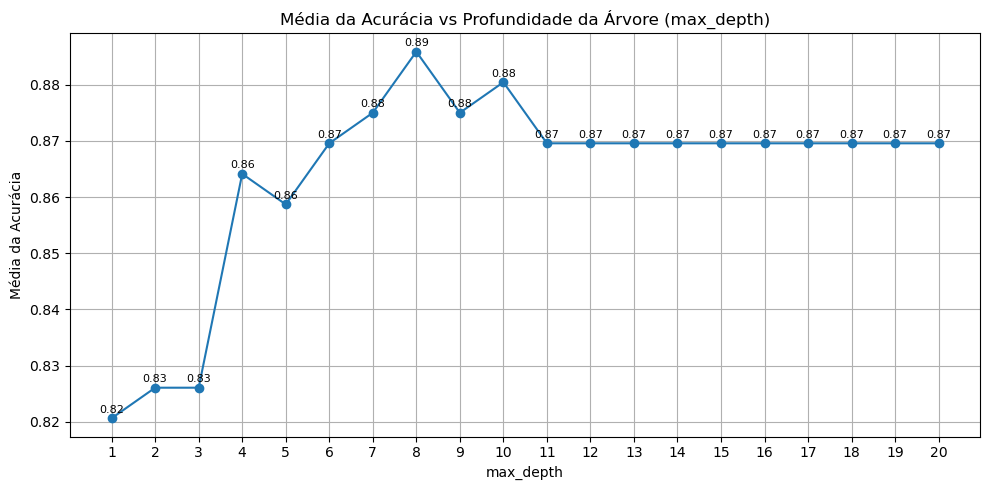

In [75]:
# Plota o gráfico com as acurácias médias
plotGraph(accuracies, depths)

Ao analisar o impacto da profundidade máxima (max_depth) nas árvores da Random Forest, observou-se um crescimento da acurácia até o valor de 8. A partir desse ponto, a acurácia estabilizou-se em torno de 0.87, indicando que profundidades maiores não trazem ganhos significativos. Portanto, max_depth = 8 representa um ponto ideal de compromisso entre desempenho e eficiência computacional.